### Описание проекта
Интернет-магазин продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Нам предоставлены данные до 2016 года. Необходимо спланировать кампанию на 2017-й. 

# Сборный проект Интернет-магазин

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd

df = pd.read_csv('games.csv')

df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [2]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Вывод

1. необходимо привести к правильным типам данных 
        Year_of_Release - datetime
        Critic_Score - int (т.к все значения целые)
        User_score - int (т.к все значения целые)

2. NA, EU, JP _sales - хранят очень много нулевых значений. Вероятно эти игры продавались не во всех странах. Поэтому оставить эти значения с нулем.
3. Пустые значения в столбцах - 
        Name и Genre всего 2 строки с пустыми значениями в этих столбцах, мы не знаем к какой игре они относятся. можно отбросить эти значения.
        Year_of_Release можно заполнить средним значение по группе соответсвующей платформы,
        Genre - всего 2 записи, 
        Critic score, User score, Raiting - очень много строк где все три столбца имеют пустое значение. Вероятно не все игры имеют оценки критиков. Поэтому нам придеться заполнить их нулями, чтобы иметь возможность сменить тип данных. И во время анализа эти выбросы можно будет отфильтровать. (На данный момент все существующие оценки выше нуля)
4. Raiting - присваивается на основании правил ESRB. Пустые значения можно заменить на RP.
        RP - This symbol is used in promotional materials for games which have not yet been assigned a final rating by the ESRB
5. Привести названия столбцов к нижнему регистру

Можно предположить, что эти данные взяты с сайта https://www.metacritic.com

TBD (To Be Determined.) -  значение устанавливается если игра набрала меньше 4ых отзывов.

https://www.metacritic.com/faq#item13
...we do not display a METASCORE for those items that do not have at least four (4) reviews in our database. Once this minimum number of reviews is reached, the METASCORE will display.


## Шаг 2. Подготовьте данные

In [4]:
df.columns = df.columns.str.lower()

df['critic_score'] = df['critic_score'].fillna(0)
df['user_score'] = df['user_score'].fillna('0.0')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN


In [5]:
import math

def tbd_null(row):
    if row['user_score'] == 'tbd':
        return '0.0'
    else:
        return row['user_score']


df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df = df.dropna(subset=['genre'])

df['year_of_release'] = df['year_of_release'].fillna('1970')
df['user_score'] = df.apply(tbd_null, axis=1)
df['rating'] = df['rating'].fillna('RP')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null object
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null object
rating             16713 non-null object
sum_sales          16713 non-null float64
dtypes: float64(6), object(6)
memory usage: 1.7+ MB


In [6]:

try:
    
    df['year_of_release'] = df['year_of_release'].astype('int')
    df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')
    df['user_score'] = df['user_score'].astype('float')
except:
    print('Error of convertion')

#df['user_score'].unique()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null datetime64[ns]
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
sum_sales          16713 non-null float64
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 1.7+ MB


#### Вывод

- Заполнили нулями пропуски в оценках.
- Привели к нижнему регистру названия столбцов
- заменили tbd на 0 в user_score. TBD (To Be Determined.) - значение устанавливается если игра набрала меньше 4ых отзывов. Т.е ее нельзя оценивать и нужно поступить с ней как с пропущенным значением, т.е заменить на 0.
- подсчитали общую сумму продаж
- отбросили строки где есть пропуски в genre
- заполнили пропуски в year_of_release значением 1970. Значение выбрали чтоб было похоже на год и можно было привести к типу datetime
- пропуски в rating заменили на RP, т.к если рейтинг не присвоен игре, то как минимум он должен быть RP (Rating Pending)
- привели к нужным типам данных. year_of_release->datetime; user_score->float

## Шаг 3. Проведите исследовательский анализ данных

Text(0.5, 1.0, 'releases per year')

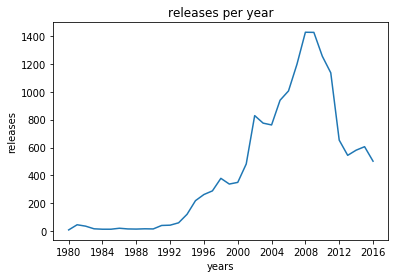

In [7]:
import warnings
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')
summary_all = df.query('1970<year_of_release<2017').pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
plt.plot(summary_all['year_of_release'],summary_all['name'] )
plt.ylabel('releases')
plt.xlabel('years')
plt.title('releases per year')

#### Вывод
В данном графике можно сделать вывод, что количество релизов начинает существенно расти с 1990х годов. Пиковое значение приходиться на 2008 год после которого идет значительные спад. 

          sum_sales
platform           
PS2         1255.77
X360         971.42
PS3          939.65
Wii          907.51
DS           806.12
PS           730.86
GBA          317.85
PS4          314.14
PSP          294.05
PC           259.52

Средняя продолжительность жизни платформы = 10.00 лет 


,min,max,life_time
platform,,,
DS,2004-01-01,2013-01-01,3288 days
GBA,2000-01-01,2007-01-01,2557 days
PC,1994-01-01,2016-01-01,8035 days
PS,1994-01-01,2003-01-01,3287 days
PS2,2000-01-01,2011-01-01,4018 days
PS3,2006-01-01,2016-01-01,3652 days
PS4,2013-01-01,2016-01-01,1095 days
PSP,2004-01-01,2015-01-01,4018 days
Wii,2006-01-01,2016-01-01,3652 days


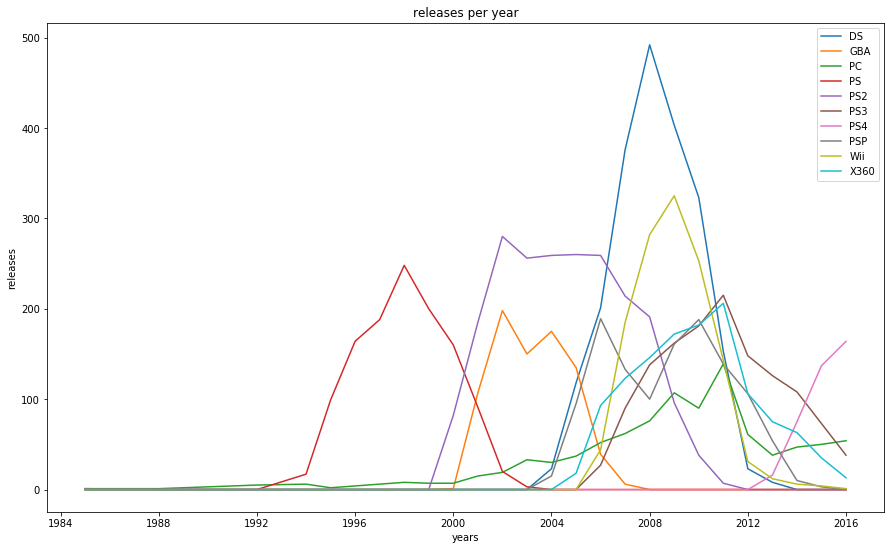

platform,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,81.576923,31.192308,36.807692,45.769231,81.807692,50.230769,15.076923,45.884615,49.461538,47.384615
std,149.132203,62.694191,36.323017,78.398626,110.567272,70.347314,42.725096,67.161493,98.654642,67.648549
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,6.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,31.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,94.250000,4.750000,53.500000,73.250000,189.500000,103.500000,0.000000,98.750000,26.250000,88.500000
max,492.000000,198.000000,139.000000,248.000000,280.000000,215.000000,164.000000,189.000000,325.000000,206.000000


In [8]:
top_10_sales_platform = df.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values('sum_sales',ascending=False).head(10)
print(top_10_sales_platform)
summary_platforms = df.query('platform in @top_10_sales_platform.index and 1970<year_of_release<2017').pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count').reset_index()
summary_platforms = summary_platforms.fillna(0)

years_of_platforms = df.query('platform in @top_10_sales_platform.index and 1992<year_of_release<2017').pivot_table(index='platform', values='year_of_release', aggfunc=['min','max'])
years_of_platforms.columns = ['min', 'max']
years_of_platforms['life_time'] = years_of_platforms['max'] - years_of_platforms['min']
print()
print('Средняя продолжительность жизни платформы = {:.2f} лет '.format(round(years_of_platforms['life_time'].mean().days/365)))

display(years_of_platforms)
fig, ax = plt.subplots(figsize=(15, 9))
lines = ax.plot(summary_platforms['year_of_release' ], summary_platforms.loc[:, 'DS': ])
names = summary_platforms.columns[1:]
for i in range(len(lines)):
    lines[i].set_label(names[i])

plt.ylabel('releases')
plt.xlabel('years')

plt.legend()
plt.title('releases per year')
plt.show()
summary_platforms.describe()


#### Вывод
Здесь мы выбрали 10 платформ с наибольшими суммарными продажами
1. На графке можно заметить характерный период 2004-2010 появления новых консолей и спада продаж старых консолей.
2. По сумме продаж среди платформ лидирует PS2, после него идут X360, PS3, Wii, DS, PS. Далее построим график для этих платформ и понаблюдаем за их динамикой
3. По графику так же можно сказать, что средняя продолжительность жизни платформы на пике популярности составляет 5 лет. А полный цикл жизни по расчетам равен 10 годам. За этот период исчезают старые и появляются новые платформы.
4. Если сегодня декабрь 2016, то в качестве актуального периода возьмем период с 2012 по 2016 (5 лет). 


platform,year_of_release,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2012-01-01,93.0,23.0,61.0,148.0,0.0,106.0,53.0,31.0,32.0,106.0,0.0
1,2013-01-01,91.0,8.0,38.0,126.0,16.0,54.0,63.0,12.0,42.0,75.0,19.0
2,2014-01-01,80.0,0.0,47.0,108.0,75.0,10.0,100.0,6.0,31.0,63.0,61.0
3,2015-01-01,86.0,0.0,50.0,73.0,137.0,3.0,110.0,4.0,28.0,35.0,80.0
4,2016-01-01,46.0,0.0,54.0,38.0,164.0,0.0,85.0,1.0,14.0,13.0,87.0


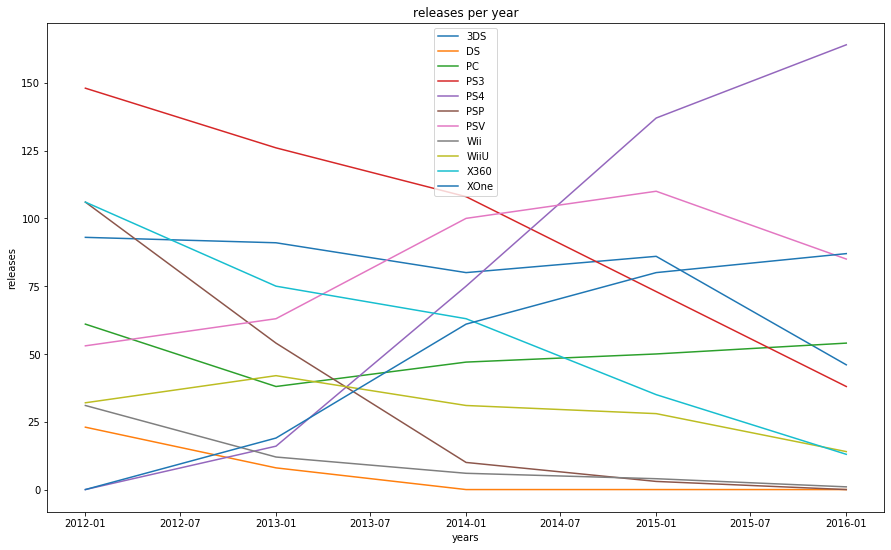

platform,year_of_release,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2012-01-01,51.36,11.01,23.22,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00
1,2013-01-01,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2,2014-01-01,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
3,2015-01-01,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
4,2016-01-01,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


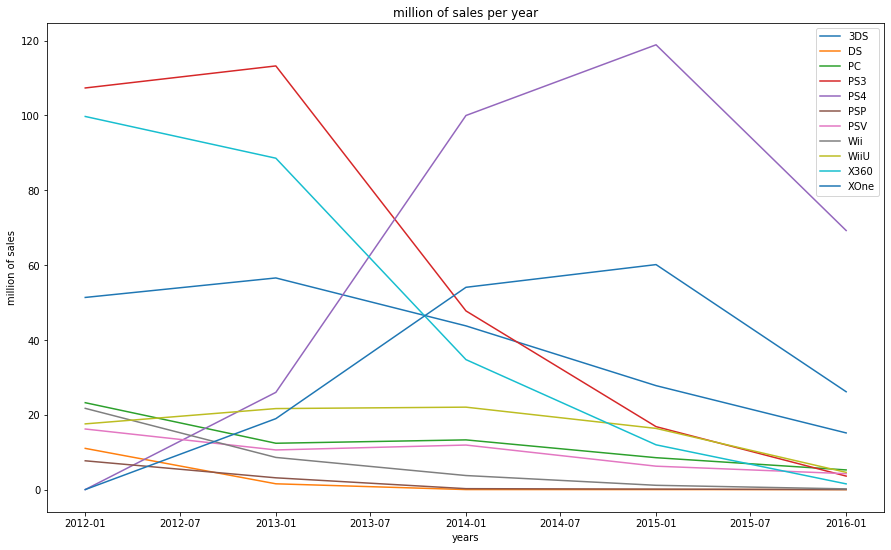

In [9]:
actual_data = df.query('2011 < year_of_release<2017')
actual_release_count = actual_data.pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count').reset_index()
actual_release_count = actual_release_count.fillna(0)

display(actual_release_count.head())
fig, ax = plt.subplots(figsize=(15, 9))
lines = ax.plot(actual_release_count['year_of_release' ], actual_release_count.loc[:, '3DS': ])
names = actual_release_count.columns[1:]
for i in range(len(lines)):
    lines[i].set_label(names[i])

plt.ylabel('releases')
plt.xlabel('years')

plt.legend()
plt.title('releases per year')
plt.show()


actual_sales_sum = actual_data.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum').reset_index()
actual_sales_sum = actual_sales_sum.fillna(0)

display(actual_sales_sum.head())
fig, ax = plt.subplots(figsize=(15, 9))
lines = ax.plot(actual_sales_sum['year_of_release' ], actual_sales_sum.loc[:, '3DS': ])
names = actual_sales_sum.columns[1:]
for i in range(len(lines)):
    lines[i].set_label(names[i])

plt.ylabel('million of sales')
plt.xlabel('years')

plt.legend()
plt.title('million of sales per year')
plt.show()

### Вывод
На данный момент (декабрь 2016года) по продаж мы видим, что платформы XOne и PS4 лидируют, но все равно падают в конце. Вероятно это из-за того что еще итоги года не подведены и не все данные о прадаж у нас есть. 
Так же мы видим что по количеству релизов эти платформы (PS4 XOne) так же лидируют и графики релизов идут вверх. 

По остальным платформам не все так однозначно. Вот к примеру PSV набирает обороты по количеству релизов в год, но по продажам находятся очень низко и не растет. А PC немного набрал по количеству релизов, а по продажам все так же низко.

Потенциально прибыльными платформами можно назвать: PS4, XOne

Text(0.5, 1.0, 'Boxplot of sales per platform')

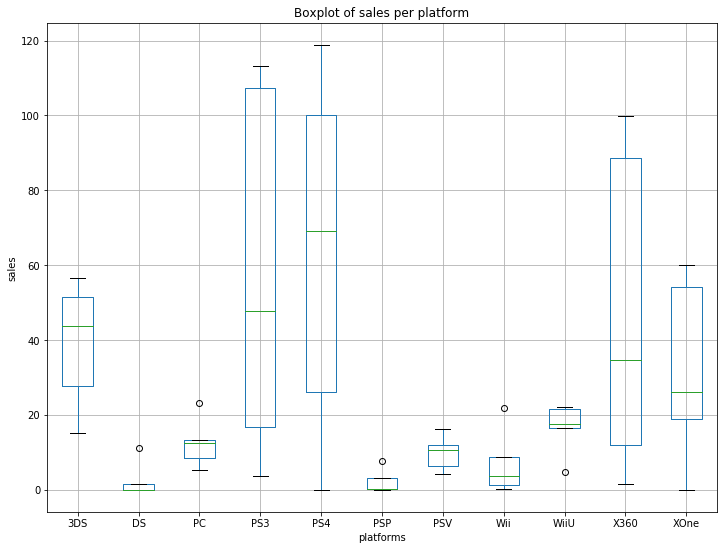

In [10]:
actual_sales_sum.loc[:,'3DS' :].boxplot(figsize=(12,9))
plt.ylabel('sales')
plt.xlabel('platforms')
plt.title('Boxplot of sales per platform')


### Вывод
по данном боксплотов за актуальный период можно сказать, что у топовых платформ таких как PS3 PS4 X360 продажи бывали разные и от совсем низких от 0-10 млн и до очень высоких 100-120 млн. 

У большенства же менее популярных платформ большая часть показателей проджа находятся в интервале от 0 до 20 млн.

Correlation between scores and sales for PS4 platform
              user_score  critic_score  sum_sales
user_score      1.000000      0.557654  -0.033625
critic_score    0.557654      1.000000   0.405895
sum_sales      -0.033625      0.405895   1.000000

Correlation between scores and sales for all platforms
              user_score  critic_score  sum_sales
user_score      1.000000      0.517727   0.000597
critic_score    0.517727      1.000000   0.306516
sum_sales       0.000597      0.306516   1.000000


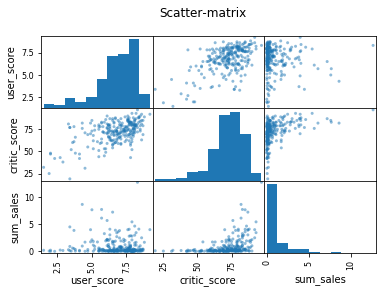

In [11]:
ps4 = actual_data[actual_data['platform'] == 'PS4'].query('user_score>0 and critic_score>0')
pd.plotting.scatter_matrix(ps4[['name', 'user_score', 'critic_score', 'sum_sales']])
plt.suptitle('Scatter-matrix')
print('Correlation between scores and sales for PS4 platform')
print(ps4[['name', 'user_score', 'critic_score', 'sum_sales']].corr())
print()
print('Correlation between scores and sales for all platforms')
all = actual_data.query('user_score>0 and critic_score>0')
print(all[['user_score', 'critic_score', 'sum_sales']].corr())

### Вывод для PS4
Здесь мы видим, что продажи имееют зависимости от оценок критиков. Коэфициент корреляции = 0.4. 

Что же до оценок пользователей, то они почти никак не связаны с количеством продаж. Коэфициент корреляции = -0.03

### Вывод для всех платформ
Если посчитать подобную корреляцию для всех платформ, то можно заметить, что значение корреляции продаж и оценок критиков чуть ниже (0.3) чем для PS4, но все же не нулевая. А на счет пользовательнских оценок наши выводы остались прежними. Связи почти нет. 

In [12]:
genre_sum = actual_data.pivot_table(index='genre', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False)
print(genre_sum)

              sum_sales
genre                  
Action           441.12
Shooter          304.73
Role-Playing     192.80
Sports           181.07
Misc              85.04
Platform          61.00
Racing            53.50
Fighting          44.49
Simulation        35.12
Adventure         29.43
Strategy          13.34
Puzzle             4.89


### Вывод
Самые популярные жанры это эмоциональные жанры, а именно: Action и Shooter.

Самые не популярные жанры это те в которых надо тратить больше времени и больше прикладывать умственных способностей: Strategy, Adventure, Puzzle

## Шаг 4. Составьте портрет пользователя каждого региона

In [13]:
def print_top_5_sales(sales):
    sales = sales.sort_values(ascending=False)
    sales = round(sales/sales.sum(),2)
    print(sales.head(5))
    return sales.head(3).index.tolist()
    
region_sales = actual_data.query('na_sales>0 and eu_sales>0 and jp_sales>0').pivot_table(index='platform' ,values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
top_3_region_platforms = {}
for i in region_sales.columns:
    print('\t',i)
    top_3_region_platforms[i[:2]] = print_top_5_sales(region_sales[i])
    print()



	 eu_sales
platform
PS4     0.37
PS3     0.26
X360    0.13
3DS     0.11
WiiU    0.06
Name: eu_sales, dtype: float64

	 jp_sales
platform
3DS     0.46
PS3     0.20
WiiU    0.11
PS4     0.11
PSV     0.06
Name: jp_sales, dtype: float64

	 na_sales
platform
PS4     0.24
X360    0.22
PS3     0.21
3DS     0.14
WiiU    0.08
Name: na_sales, dtype: float64



In [14]:
region_genre_sales = actual_data.query('na_sales>0 and eu_sales>0 and jp_sales>0').pivot_table(index='genre' ,values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
top_3_region_genres = {}
for i in region_genre_sales.columns:
    print('\t',i)
    top_3_region_genres[i[:2]] = print_top_5_sales(region_genre_sales[i])
    print()
    

	 eu_sales
genre
Action          0.31
Shooter         0.26
Sports          0.12
Role-Playing    0.11
Racing          0.06
Name: eu_sales, dtype: float64

	 jp_sales
genre
Role-Playing    0.34
Action          0.22
Shooter         0.08
Simulation      0.08
Platform        0.08
Name: jp_sales, dtype: float64

	 na_sales
genre
Shooter         0.30
Action          0.30
Role-Playing    0.14
Sports          0.07
Platform        0.05
Name: na_sales, dtype: float64



In [15]:
rating_region_sales = actual_data.query('na_sales>0 and eu_sales>0 and jp_sales>0 and rating!="RP"').pivot_table(index='rating' ,values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
top_3_region_rating = {}
for i in rating_region_sales.columns:
    print('\t',i)
    top_3_region_rating[i[:2]] = print_top_5_sales(rating_region_sales[i])
    print()
    

	 eu_sales
rating
M       0.54
E       0.29
T       0.11
E10+    0.06
Name: eu_sales, dtype: float64

	 jp_sales
rating
E       0.39
M       0.27
T       0.25
E10+    0.09
Name: jp_sales, dtype: float64

	 na_sales
rating
M       0.59
E       0.20
T       0.13
E10+    0.08
Name: na_sales, dtype: float64



In [16]:
for i in top_3_region_platforms.keys():
    print()
    print('Потенциально прибыльные игры в регионе', i)
    display(actual_data.query('platform in ["XOne", "PS4"] and genre in @top_3_region_genres[@i] and year_of_release==2016 and rating in @top_3_region_rating[@i] ').sort_values(by='critic_score', ascending=False).head())


Потенциально прибыльные игры в регионе eu


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
171,Uncharted 4: A Thief's End,PS4,2016-01-01,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
1948,Overwatch,XOne,2016-01-01,Shooter,0.63,0.33,0.00,0.10,91.0,5.6,T,1.06
767,Overwatch,PS4,2016-01-01,Shooter,0.81,0.85,0.15,0.33,90.0,6.1,T,2.14
2024,NBA 2K17,XOne,2016-01-01,Sports,0.86,0.06,0.00,0.11,90.0,6.2,E,1.03
2718,Titanfall 2,PS4,2016-01-01,Shooter,0.34,0.25,0.05,0.12,89.0,8.4,M,0.76



Потенциально прибыльные игры в регионе jp


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
171,Uncharted 4: A Thief's End,PS4,2016-01-01,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
1948,Overwatch,XOne,2016-01-01,Shooter,0.63,0.33,0.00,0.10,91.0,5.6,T,1.06
767,Overwatch,PS4,2016-01-01,Shooter,0.81,0.85,0.15,0.33,90.0,6.1,T,2.14
2718,Titanfall 2,PS4,2016-01-01,Shooter,0.34,0.25,0.05,0.12,89.0,8.4,M,0.76
1107,Dark Souls III,PS4,2016-01-01,Role-Playing,0.65,0.45,0.34,0.22,89.0,8.8,M,1.66



Потенциально прибыльные игры в регионе na


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
171,Uncharted 4: A Thief's End,PS4,2016-01-01,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
1948,Overwatch,XOne,2016-01-01,Shooter,0.63,0.33,0.00,0.10,91.0,5.6,T,1.06
767,Overwatch,PS4,2016-01-01,Shooter,0.81,0.85,0.15,0.33,90.0,6.1,T,2.14
2718,Titanfall 2,PS4,2016-01-01,Shooter,0.34,0.25,0.05,0.12,89.0,8.4,M,0.76
1107,Dark Souls III,PS4,2016-01-01,Role-Playing,0.65,0.45,0.34,0.22,89.0,8.8,M,1.66


### Вывод
Платформы:
1. Самые популярные платформы в Японии это 3DS,PS3,WiiU
2. Самые популярные платформы в Европе это PS4, PS3, X360
3. Самые популярные платформы в Сев.Америке это PS4, X360, PS3

Жанры:
1. Самые популярные жанры в Японии: Role-Playing, Action, Shooter
2. Самые популярные жанры в Европе: Action, Shooter, Sports
3. Самые популярные жанры в Сев.Америке: Shooter, Action, Role-Playing

Рейтинги:
1. В Японии наиболее популярны игры с рейтингом Everyone и Mature
2. В Европе и Северной Америке лидируют игры с рейтингом Mature

Так же здесь, основываяся на региональных предпочтениям, мы вывели по 5 потенциально прибыльных игр для каждого региона, дополнительно отсортировав их по столбцу critic_score. И как можем заметить во всех регионах присутствуют:
 - Overwatch
 - Titanfall 2
 - Uncharted 4: A Thief's End.
 
  В JP и NA регионах также стоит сделать упор на Dark Souls III
 
 Надо заметить, что здесь мы рассматривали только игры под платформы PS4 и Xone, так как посчитали их потенциально прибыльными исходя из предыдущих данных. 
 


## Шаг 5. Проверьте гипотезы

Проверка гипотезыо том, что  средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
По критерию Левена, дисперсия двух выборок отличаются Pvalue = 0.006629
	результаты проверки:
	Нет оснований отвергать нулевую гипотезу о равенстве средних двух выборок. P_value= 0.55

Проверка гипотезы о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые
По критерию Левена, дисперсия двух выборок отличаются Pvalue = 2.6e-05
	результаты проверки:
	Отвергаем нулевую гипотезу о равенстве средних двух выборок. P_value= 0.0



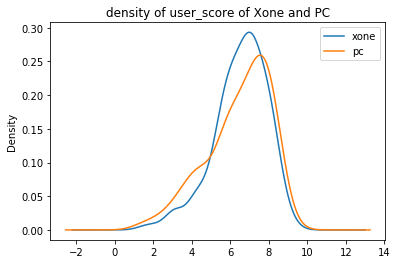

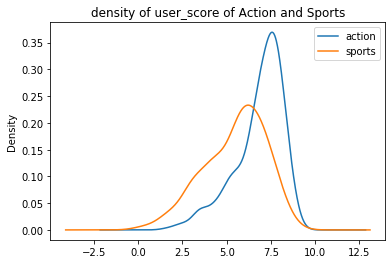

In [18]:
alpha = .05

from scipy import stats as st

def chk_var_leven(samp1, samp2):
    cnt = min(samp1.shape[0],samp2.shape[0] )

    _, pvalue = st.levene(samp1.head(cnt), samp2.head(cnt))
    if pvalue < alpha:
        print('По критерию Левена, дисперсия двух выборок отличаются Pvalue =', round(pvalue,6))
        return False
    else:
        print('По критерию Левена, дисперсия двух выборок схожи Pvalue =', round(pvalue,6))
        return True


print('Проверка гипотезыо том, что  средние пользовательские рейтинги платформ Xbox One и PC одинаковые;')
xone = actual_data.query('user_score>0 and platform=="XOne"')
pc = actual_data.query('user_score>0 and platform=="PC"')



equal = chk_var_leven(pc['user_score'], xone['user_score'])

results = st.ttest_ind(pc['user_score'], xone['user_score'], equal_var=equal)
print('\tрезультаты проверки:')
if results.pvalue < alpha:
    print('\tОтвергаем нулевую гипотезу о равенстве средних двух выборок. P_value=', round(results.pvalue,6))
else:
    print('\tНет оснований отвергать нулевую гипотезу о равенстве средних двух выборок. P_value=', round(results.pvalue,2))
    

print()
print('Проверка гипотезы о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые')
action = actual_data.query('user_score>0 and genre=="Action"')
sports = actual_data.query('user_score>0 and genre=="Sports"')


equal = chk_var_leven(action['user_score'], sports['user_score'])
results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=equal)
print('\tрезультаты проверки:')
if results.pvalue < alpha:
    print('\tОтвергаем нулевую гипотезу о равенстве средних двух выборок. P_value=', round(results.pvalue,6))
else:
    print('\tНет оснований отвергать нулевую гипотезу о равенстве средних двух выборок. P_value=', round(results.pvalue,6))
    

print()
line1 = xone['user_score'].plot.kde(legend=True, title='density of user_score of Xone and PC', label='xone')
line2 = pc['user_score'].plot.kde(legend=True, title='density of user_score of Xone and PC', label='pc')


plt.show()
line1 = action['user_score'].plot.kde(legend=True, title='density of user_score of Action and Sports', label='action')
line2 = sports['user_score'].plot.kde(legend=True, title='density of user_score of Action and Sports', label='sports')


#### Вывод
Нам надо было проверить две гипотезы:
    1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    H_0: средние выборок равны
    H_1: средние выборок неравны
    Результат: мы не смогли отвергнуть нулевую гипотезу.
    
    2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    H_0: средние выборок равны
    H_1: средние выборок неравны
    Результат: мы отвергли нулевую гипотезу. 
    
Мы взяли alpha=0.05 т.к это допустимый уровень значимости для данных выборок. 
Для проверки гипотез мы применили тест Стьюдента, т.к расределения похожи на нормальные и количества значений в выборках достаточно для данного теста. Так же при проверке гипотез мы сравнили дисперсии с помощью критерия Левена. И обнаружили что в обоих случаях дисперсии отличаются.

Таким образом обе гипотезы которые были даны по условию задачи подтвердились.
    


## Вывод
На успешность игры влияют:
1. Оценки критиков
2. Жанр игры. 
3. Рейтинг игры по версии ESRB
4. Популярность платформы на которой она вышла 
5. Так же продажи будут зависеть и от региона в котором выходит данная игра. 

Средняя продолжительность жизни платформы около 10 лет. Но на пике популярности можно взять период около 5-6 лет. 
В данное время потенциально прибыльными можно считать  PS4 и XOne. И на них можно сделать ставку в будущих рекламных кампаниях.
В плане жанров упор стоит сделать на Action, Platform, Shooter. И рейтинг желательно чтоб был E, M или T. 

Во всех регионах стоит сделать упор на:
 - Overwatch
 - Titanfall 2
 - Uncharted 4: A Thief's End.
 
 В JP и NA регионах также стоит сделать упор на 
 - Dark Souls III
 
 А в EU делаем ставку на:
 - NBA 2K17